##**Problem Statement:** </br>
###**Understanding how drought conditions correlate with electricity prices in the Northeast's electricity utilities.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.ticker as ticker
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
output_notebook()

### **Data Cleaning:**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/chinarbu/TeamA1_capstone/main/NIDIS.csv?token=GHSAT0AAAAAABQYWJDRDVLMZPZ3HQAY2RICYRH72YA")
df.head()

,Year,Month,State,Revenue(Thousand $),Consumption(Megawatthours),Customers(Count),Price(Cents/kWh),Precipitation,Temperature,nat_gas_to_elect_power,PS-Wtotl,DO-WFrTo,DO-WDelv,IN-Wtotl,IR-WFrTo,IR-RecWW,IR-IrSpr,IR-IrMic,IR-IrSur,IC-WFrTo,IC-RecWW,IC-IrSpr,IC-IrMic,IC-IrSur,IG-WFrTo,IG-RecWW,IG-IrSpr,IG-IrMic,IG-IrSur,LI-WFrTo,AQ-WTotl,MI-Wtotl,PT-Wtotl,PT-RecWW,PT-PSDel,PT-Power,PO-WTotl,PO-RecWW,PO-PSDel,PO-Power,PC-WTotl,PC-RecWW,PC-PSDel,PC-Power
0,2011,1,CT,"466,863","2,780,309","1,614,219",16.79,3.36,23.2,7686.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
1,2011,2,CT,"387,663","2,390,927","1,572,803",16.21,3.84,27.1,7771.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
2,2011,3,CT,"398,719","2,436,332","1,614,558",16.37,4.74,37.0,6673.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
3,2011,4,CT,"370,989","2,260,627","1,612,808",16.41,5.52,48.9,6958.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54
4,2011,5,CT,"376,033","2,300,770","1,611,524",16.34,4.87,59.7,8366.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54


In [ ]:
df1 = pd.get_dummies(df, columns=['State'])

In [ ]:
df1.columns

Index(['Year', 'Month', 'Revenue(Thousand $)', 'Consumption(Megawatthours)',
       'Customers(Count)', 'Price(Cents/kWh)', 'Precipitation', 'Temperature',
       'nat_gas_to_elect_power', 'PS-Wtotl', 'DO-WFrTo', 'DO-WDelv ',
       'IN-Wtotl', 'IR-WFrTo', 'IR-RecWW', 'IR-IrSpr', 'IR-IrMic', 'IR-IrSur',
       'IC-WFrTo', 'IC-RecWW', 'IC-IrSpr', 'IC-IrMic', 'IC-IrSur', 'IG-WFrTo',
       'IG-RecWW', 'IG-IrSpr', 'IG-IrMic', 'IG-IrSur', 'LI-WFrTo', 'AQ-WTotl',
       'MI-Wtotl', 'PT-Wtotl', 'PT-RecWW', 'PT-PSDel', 'PT-Power', 'PO-WTotl',
       'PO-RecWW', 'PO-PSDel', 'PO-Power', 'PC-WTotl', 'PC-RecWW', 'PC-PSDel',
       'PC-Power', 'State_CT', 'State_MA', 'State_ME', 'State_NH', 'State_NY',
       'State_RI', 'State_VT'],
      dtype='object')

In [ ]:
df1['Consumption(Megawatthours)'] = df1['Consumption(Megawatthours)'].replace(',', '',regex=True)
df1['Customers(Count)']=df1['Customers(Count)'].replace(',','',regex=True)
df1['Revenue(Thousand $)']=df1['Revenue(Thousand $)'].replace(',','',regex=True)

In [ ]:
df1.head()

,Year,Month,Revenue(Thousand $),Consumption(Megawatthours),Customers(Count),Price(Cents/kWh),Precipitation,Temperature,nat_gas_to_elect_power,PS-Wtotl,DO-WFrTo,DO-WDelv,IN-Wtotl,IR-WFrTo,IR-RecWW,IR-IrSpr,IR-IrMic,IR-IrSur,IC-WFrTo,IC-RecWW,IC-IrSpr,IC-IrMic,IC-IrSur,IG-WFrTo,IG-RecWW,IG-IrSpr,IG-IrMic,IG-IrSur,LI-WFrTo,AQ-WTotl,MI-Wtotl,PT-Wtotl,PT-RecWW,PT-PSDel,PT-Power,PO-WTotl,PO-RecWW,PO-PSDel,PO-Power,PC-WTotl,PC-RecWW,PC-PSDel,PC-Power,State_CT,State_MA,State_ME,State_NH,State_NY,State_RI,State_VT
0,2011,1,466863,2780309,1614219,16.79,3.36,23.2,7686.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
1,2011,2,387663,2390927,1572803,16.21,3.84,27.1,7771.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
2,2011,3,398719,2436332,1614558,16.37,4.74,37.0,6673.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
3,2011,4,370989,2260627,1612808,16.41,5.52,48.9,6958.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0
4,2011,5,376033,2300770,1611524,16.34,4.87,59.7,8366.0,239.93,30.83,126.82,222.33,11.31,0,17.54,0.71,0.0,4.44,0,8.56,0.71,0.0,6.87,0,8.98,0.0,0,1.15,25.17,4.25,2593.13,0.0,4.65,30979.71,2590.17,0.0,0.0,21938.17,2.96,0.0,4.65,9041.54,1,0,0,0,0,0,0


In [ ]:
# data type cleaning
df1['Consumption(Megawatthours)']=df1['Consumption(Megawatthours)'].astype(int)
df1['Customers(Count)']=df1['Customers(Count)'].astype(int)
df1['Revenue(Thousand $)']=df1['Revenue(Thousand $)'].astype(int)

In [ ]:
# Check missing values
df1.isna().sum()

Year                            0
Month                           0
Revenue(Thousand $)             0
Consumption(Megawatthours)      0
Customers(Count)                0
Price(Cents/kWh)                0
Precipitation                   0
Temperature                     0
nat_gas_to_elect_power        120
PS-Wtotl                        0
DO-WFrTo                        0
DO-WDelv                        0
IN-Wtotl                        0
IR-WFrTo                        0
IR-RecWW                        0
IR-IrSpr                        0
IR-IrMic                        0
IR-IrSur                        0
IC-WFrTo                        0
IC-RecWW                        0
IC-IrSpr                        0
IC-IrMic                        0
IC-IrSur                        0
IG-WFrTo                        0
IG-RecWW                        0
IG-IrSpr                        0
IG-IrMic                        0
IG-IrSur                        0
LI-WFrTo                        0
AQ-WTotl      

In [ ]:
# fill missing values
df1['nat_gas_to_elect_power'] = df1['nat_gas_to_elect_power'].fillna(0)

## **Exploratory Data Analysis:**

#### Electricity prices' trend over the years across north-east:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


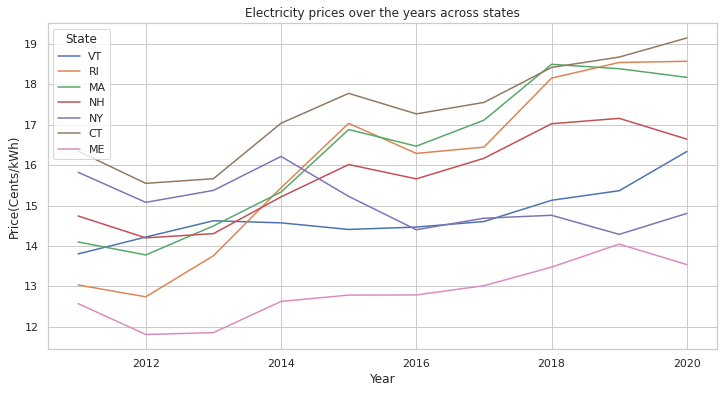

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot('Year', 'Price(Cents/kWh)', ci=None, 
             hue='State',markers= ["o","<"], data=df)
plt.title("Electricity prices over the years across states");

### Revenue from electricity within each state:


In [ ]:
# Copy of dataframe for visualization
df2 = df.copy()
df2['Consumption(Megawatthours)'] = df2['Consumption(Megawatthours)'].replace(',', '',regex=True)
df2['Customers(Count)']=df2['Customers(Count)'].replace(',','',regex=True)
df2['Revenue(Thousand $)']=df2['Revenue(Thousand $)'].replace(',','',regex=True)
df2['Consumption(Megawatthours)']=df2['Consumption(Megawatthours)'].astype(int)
df2['Customers(Count)']=df2['Customers(Count)'].astype(int)
df2['Revenue(Thousand $)']=df2['Revenue(Thousand $)'].astype(int)
df2['Consumption(Megawatthours)']=round(df2['Consumption(Megawatthours)'])
df2['Revenue(Thousand $)']=round(df2['Revenue(Thousand $)'])
df2['Consumption(Megawatthours)']=round(df2['Consumption(Megawatthours)'])
df2['Revenue(Thousand $)']=round(df2['Revenue(Thousand $)'])

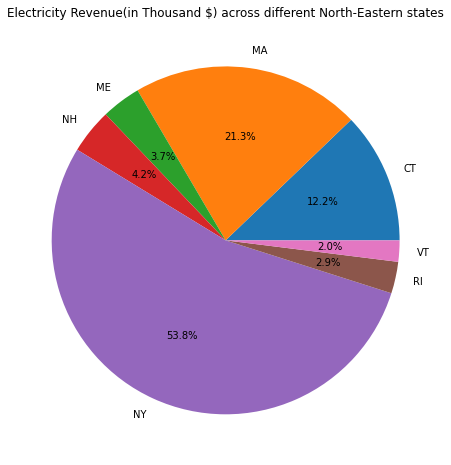

In [ ]:
plt.figure(figsize=(12,8))
df3 = pd.DataFrame({
  "Rev_per_state": df2.groupby('State')['Revenue(Thousand $)'].sum()
})
plt.pie(df3['Rev_per_state'], labels = df3.index,autopct='%.1f%%')
plt.title("Electricity Revenue(in Thousand $) across different North-Eastern states")
plt.show()

#### Drought conditions over the years with electricity prices:

In [ ]:
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure

p1 = figure(title = "Distribution of Electricity prices with Precipitation",x_axis_label="Millimetres",y_axis_label="Electricity price in Cents/kWh")
p1.circle('Temperature','Price(Cents/kWh)',source=df,fill_alpha=0.1, size=10,color='blue',legend_label='Precipitation')
p2 = figure(title = "Distribution of Electricity prices with Temperature",x_axis_label="Farenheit",y_axis_label="Electricity price in Cents/kWh")
p2.circle('Precipitation','Price(Cents/kWh)',source=df,fill_alpha=0.1, size=10,color='red',legend_label='Temperature')
row2 = row([p1, p2])
#p.legend.location = "bottom_right"
show(row2);


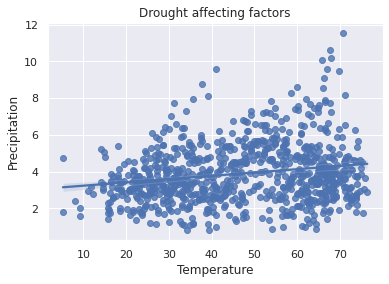

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
ax = sns.regplot(x="Temperature", y="Precipitation", data=df)
plt.title("Drought affecting factors");

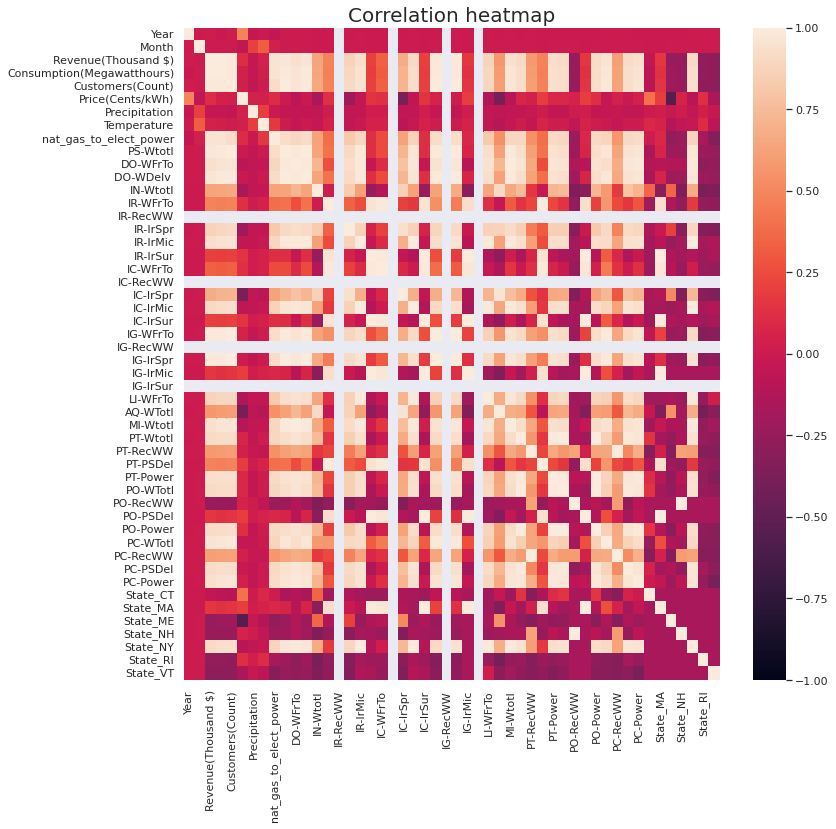

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(),vmin=-1,vmax=1, annot = False)
plt.title("Correlation heatmap", fontsize=20)
plt.show()

In [ ]:
df=df.sort_values(by='Year', ascending = False, axis=0)

In [ ]:
df.columns

Index(['Year', 'Month', 'State', 'Revenue(Thousand $)',
       'Consumption(Megawatthours)', 'Customers(Count)', 'Price(Cents/kWh)',
       'Precipitation', 'Temperature', 'nat_gas_to_elect_power', 'PS-Wtotl',
       'DO-WFrTo', 'DO-WDelv ', 'IN-Wtotl', 'IR-WFrTo', 'IR-RecWW', 'IR-IrSpr',
       'IR-IrMic', 'IR-IrSur', 'IC-WFrTo', 'IC-RecWW', 'IC-IrSpr', 'IC-IrMic',
       'IC-IrSur', 'IG-WFrTo', 'IG-RecWW', 'IG-IrSpr', 'IG-IrMic', 'IG-IrSur',
       'LI-WFrTo', 'AQ-WTotl', 'MI-Wtotl', 'PT-Wtotl', 'PT-RecWW', 'PT-PSDel',
       'PT-Power', 'PO-WTotl', 'PO-RecWW', 'PO-PSDel', 'PO-Power', 'PC-WTotl',
       'PC-RecWW', 'PC-PSDel', 'PC-Power'],
      dtype='object')

In [ ]:
years=[2018,2019,2020,2021]
#df2=df[df.Year.isin(years)]
df2=df.copy()

In [ ]:
df2['Consumption(Megawatthours)'] = df2['Consumption(Megawatthours)'].replace(',', '',regex=True)
df2['Customers(Count)']=df2['Customers(Count)'].replace(',','',regex=True)
df2['Revenue(Thousand $)']=df2['Revenue(Thousand $)'].replace(',','',regex=True)
df2['Consumption(Megawatthours)']=df2['Consumption(Megawatthours)'].astype(int)
df2['Customers(Count)']=df2['Customers(Count)'].astype(int)
df2['Revenue(Thousand $)']=df2['Revenue(Thousand $)'].astype(int)

In [ ]:
df2['Consumption(Megawatthours)']=round(df2['Consumption(Megawatthours)'])
df2['Revenue(Thousand $)']=round(df2['Revenue(Thousand $)'])

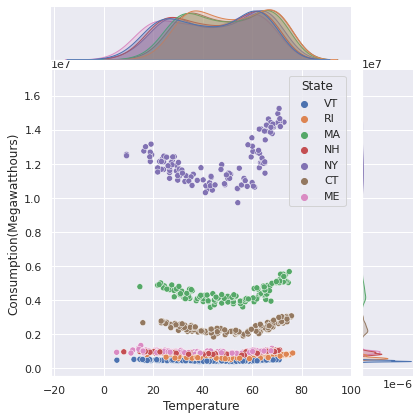

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(50,6)})
sns.jointplot(x="Temperature", y="Consumption(Megawatthours)",data=df2, hue="State");

In [ ]:
df2.groupby(by="Year", as_index=False)

In [ ]:
df2['Customers(Count)'].dtype

dtype('int64')

In [ ]:
total = df2.loc[:, 'Consumption(Megawatthours)'].sum()
total1 = df2.loc[:, 'Customers(Count)'].sum()

In [ ]:
df2.groupby(by="State")

In [ ]:
df2['per_customer_consumption']= df2['Consumption(Megawatthours)']/df2['Customers(Count)']


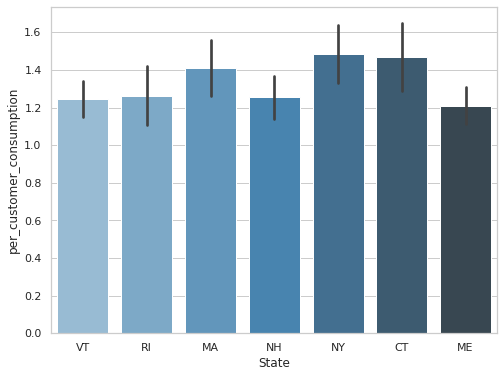

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df2,x="State",y="per_customer_consumption",ci="sd",palette="Blues_d", dodge=False);

In [ ]:
df2.columns

### **Machine Learning Predictive Modelling :**

####**Linear Regression:**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
X=df1.drop(columns='Price(Cents/kWh)',axis=1)
y=df1['Price(Cents/kWh)']

In [ ]:
# split train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.coef_,model.intercept_)

[ 3.16761272e-01 -2.66680743e-03  1.37475739e-05 -2.37622243e-06
 -4.60730653e-06  5.47314756e-02 -1.54550799e-02  1.71919863e-05
  1.11383117e-02 -1.58859214e-02 -5.75903191e-03 -2.77179089e-03
  2.89257133e-02  0.00000000e+00 -3.26715416e-03 -1.11206992e-03
  2.54809765e-03  2.81157996e-02  0.00000000e+00 -3.36042127e-03
 -1.44931705e-03  2.54809765e-03  8.09913675e-04  0.00000000e+00
  9.32671094e-05  3.37247122e-04  0.00000000e+00 -4.78621976e-03
 -1.20358486e-02 -3.59970248e-03  1.52520041e-03 -1.03889507e-03
  1.16958695e-02  2.73955835e-05  1.55679753e-03 -5.35102863e-05
  1.11760540e-02 -1.30779833e-04 -3.15971143e-05 -9.85384787e-04
  5.19815485e-04  1.58175416e-04  2.60450154e-04  2.46165782e-04
 -1.45801962e-04 -3.82216331e-04 -8.13197126e-05  5.62155545e-04
 -4.59433476e-04] -621.4194764401914


In [ ]:
print('Variance score: {}'.format(model.score(X_test, y_test)))
 

Variance score: 0.8655254478636288


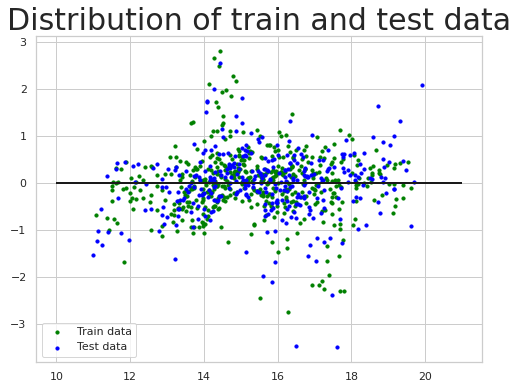

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 10, xmax = 21, linewidth = 2)
plt.legend(loc = 'lower left')
plt.title("Distribution of train and test data", fontsize=30);

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = np.round(regressor.predict(X_test))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Random Forest Regression Score:',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 0.48639880952380954
Mean Squared Error: 0.3806467261904763
Root Mean Squared Error: 0.6169657415047259
Random Forest Regression Score: 92.8576326969255


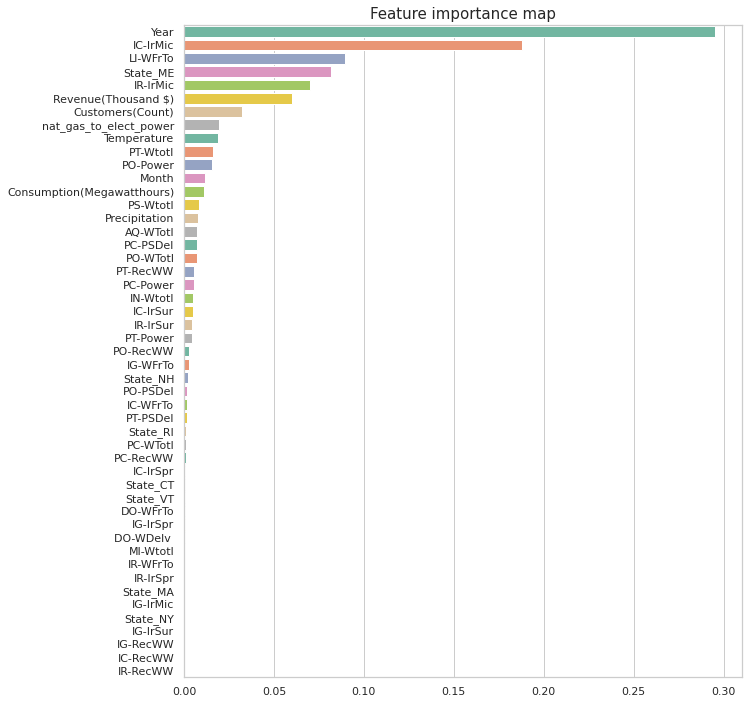

In [ ]:
# Plot features importances
import matplotlib.pyplot as plt
imp = pd.Series(data=regressor.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance map", fontsize=15)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h');

In [ ]:
# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [500, 1000, 2000], 'max_features': (3, 17), 
               'max_depth': (3, 20, 1)}]

grid_search_forest = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
rf_cv = grid_search_forest.best_estimator_
y_rf_train = rf_cv.predict(X_train)
y_rf_test = rf_cv.predict(X_test)
rf_mse_train = mean_squared_error(y_train, y_rf_train)
rf_mse_test = mean_squared_error(y_test, y_rf_test)
print('The best Random forest model from the grid search has a MSE of', round(rf_mse_test, 2))

In [ ]:
# Random forest model evaluation after cv
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rf_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rf_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_test)))
print('Random Forest Regression Score:',regressor.score(X_test,y_rf_test)*100)

In [ ]:
plt.scatter(rf_cv.predict(X_train), rf_cv.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(rf_cv.predict(X_test), rf_cv.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 10, xmax = 21, linewidth = 2)
plt.title("Random Forest Regressor", size=10)
plt.legend(loc = 'lower left');


### XGBoost model

In [ ]:
import xgboost
from numpy import loadtxt
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
pip install hyperopt

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
# space={'max_depth': hp.quniform("max_depth", 1, 7, 1),
#         'gamma': hp.uniform ('gamma', 1,9),
#         'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
#         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#         'n_estimators': 2000,
#         'seed': 0
#     }

In [ ]:
# def objective(space):
#     clf=xgb.XGBRegressor(
#                     n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                     reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
#                     colsample_bytree=int(space['colsample_bytree']))
    
#     evaluation = [( X_train, y_train), ( X_test, y_test)]
    
#     clf.fit(X_train, y_train,
#             early_stopping_rounds=10,verbose=False)
    

#     pred = clf.predict(X_test)

#     mse = metrics.mean_squared_error(y_test, pred)
#     return {'loss': -mse, 'status': STATUS_OK }

In [ ]:
# trials = Trials()

# best_hyperparams = fmin(fn = objective,
#                         space = space,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

In [ ]:
# print(best_hyperparams)

In [ ]:
clf = XGBRegressor( )
clf.fit(X_train, y_trian)

# Feature Engineering

The type of feature engineering we do is by creating a lag of electrcity from Januaray up to 12 months. The extra spaces created in the new columns will be  filled with forward fill. Since this is time series data the lag will help us uncover the seasonality.

In [ ]:

df1['lag_1'] = df['Price(Cents/kWh)'].shift(1)
df1['lag_2'] = df['Price(Cents/kWh)'].shift(2)
df1['lag_3'] = df['Price(Cents/kWh)'].shift(3)
df1['lag_4'] = df['Price(Cents/kWh)'].shift(4)
df1['lag_5'] = df['Price(Cents/kWh)'].shift(5)
df1['lag_6'] = df['Price(Cents/kWh)'].shift(6)
df1['lag_7'] = df['Price(Cents/kWh)'].shift(7)
df1['lag_8'] = df['Price(Cents/kWh)'].shift(8)
df1['lag_9'] = df['Price(Cents/kWh)'].shift(9)
df1['lag_10'] = df['Price(Cents/kWh)'].shift(10)
df1['lag_11'] = df['Price(Cents/kWh)'].shift(11)
df1['lag_12'] = df['Price(Cents/kWh)'].shift(12)

In [ ]:
df1.bfill(inplace=True)

In [ ]:
df1.head(5)